<a href="https://www.kaggle.com/code/mustafacihadgoktepe/house-prices-deep-learning?scriptVersionId=108343785" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.columns[data.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [5]:
data[data.columns[data.isnull().any()]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
data[data.columns[data.isnull().any()]].isnull().sum() * 100 / data.shape[0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [7]:
data.drop('Id', axis=1, inplace = True)
data.Alley.fillna(value='No alley access', inplace=True)
data.BsmtQual.fillna(value='No Basement', inplace=True)
data.BsmtCond.fillna(value='No Basement', inplace=True)
data.BsmtExposure.fillna(value='No Basement', inplace=True)
data.BsmtFinType1.fillna(value='No Basement', inplace=True)
data.BsmtFinType2.fillna(value='No Basement', inplace=True)
data.FireplaceQu.fillna(value='No Fireplace', inplace=True)
data.GarageType.fillna(value='No Garage', inplace=True)
data.GarageFinish.fillna(value='No Garage', inplace=True)
data.GarageQual.fillna(value='No Garage', inplace=True)
data.GarageCond.fillna(value='No Garage', inplace=True)
data.PoolQC.fillna(value='No Pool', inplace=True)
data.Fence.fillna(value='No Fence', inplace=True)
data.MiscFeature.fillna(value='None', inplace=True)

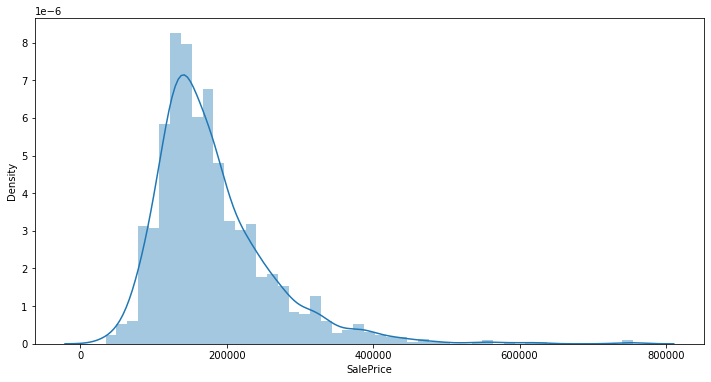

In [8]:
plt.figure(figsize = (12,6))
sns.distplot(data['SalePrice']);

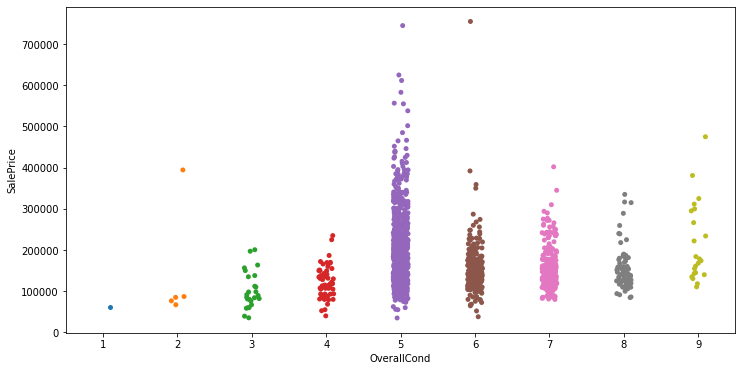

In [9]:
plt.figure(figsize = (12,6))
sns.stripplot(x='OverallCond', y='SalePrice', data=data);

In [10]:
X = data.drop('SalePrice', axis=1)
y = pd.DataFrame(data['SalePrice'])

In [11]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

features_num = X.select_dtypes(['float64', 'int64']).columns
features_cat = X.select_dtypes(['object']).columns

transformer_num = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
transformer_cat = make_pipeline(SimpleImputer(strategy="most_frequent"),
                                OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

preprocessor = make_column_transformer((transformer_num, features_num),
                                       (transformer_cat, features_cat))

X_preprocessed = pd.DataFrame(preprocessor.fit_transform(X), columns=X.columns)

In [12]:
from sklearn.feature_selection import mutual_info_regression

mi = pd.DataFrame(mutual_info_regression(X_preprocessed, y), columns=['MI Scores'], index=X.columns)
corr = pd.DataFrame(X_preprocessed[X_preprocessed.columns].corrwith(y['SalePrice']), columns=['Correlation'])
s_corr = pd.DataFrame(X_preprocessed[X_preprocessed.columns].corrwith(y['SalePrice'], method='spearman'),
                      columns=['Spearman_Correlation'])

relation = corr.join([mi, s_corr])
relation.sort_values(by='Correlation', ascending=False)

,Correlation,MI Scores,Spearman_Correlation
LotArea,0.790982,0.560524,0.809829
HouseStyle,0.708624,0.482508,0.731310
MasVnrArea,0.640409,0.363885,0.690711
ExterQual,0.623431,0.364613,0.649379
Neighborhood,0.613581,0.367266,0.602725
Condition1,0.605852,0.308841,0.575408
YearBuilt,0.560664,0.248090,0.635957
Exterior1st,0.533723,0.217858,0.532586
Alley,0.522897,0.364394,0.652682
LotShape,0.507101,0.254061,0.571159


I will drop some columns:

In [13]:
X_preprocessed.drop(labels=['TotRmsAbvGrd', 'Electrical', 'OverallCond', 'BsmtFinSF2'], axis=1, inplace=True)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_preprocessed, y, train_size=0.8, test_size=0.2)

In [15]:
X_train.shape

(1168, 75)

In [30]:
from tensorflow.keras import Sequential, layers, losses, metrics, callbacks

model = Sequential([
    layers.BatchNormalization(input_shape=[75]),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=losses.MeanAbsoluteError(),
              metrics=[metrics.MeanAbsoluteError(name='mean_absolute_error', dtype=None),
                       metrics.MeanSquaredError(name='mean_squared_error', dtype=None),
                       metrics.RootMeanSquaredError(name='root_mean_squared_error', dtype=None)]                       
             )

early_stopping = callbacks.EarlyStopping(min_delta=0.001,
                                         patience=20,
                                         restore_best_weights=True)

lr_rop = callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience= 5,
                                              factor = 0.2, verbose = 1,
                                              min_lr = 5e-10)

In [31]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_35 (Batc (None, 75)                300       
_________________________________________________________________
dropout_35 (Dropout)         (None, 75)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               38912     
_________________________________________________________________
batch_normalization_36 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_36 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 512)               262656    
_________________________________________________________________
batch_normalization_37 (Batc (None, 512)              

Epoch 1/1000
37/37 [==============================] - 3s 27ms/step - loss: 179137.4062 - mean_absolute_error: 179137.4062 - mean_squared_error: 38216433664.0000 - root_mean_squared_error: 195490.2344 - val_loss: 188053.3906 - val_mean_absolute_error: 188053.3906 - val_mean_squared_error: 42329534464.0000 - val_root_mean_squared_error: 205741.4219
Epoch 2/1000
37/37 [==============================] - 1s 16ms/step - loss: 179136.0625 - mean_absolute_error: 179136.0625 - mean_squared_error: 38215962624.0000 - root_mean_squared_error: 195489.0312 - val_loss: 188052.4531 - val_mean_absolute_error: 188052.4531 - val_mean_squared_error: 42329161728.0000 - val_root_mean_squared_error: 205740.5156
Epoch 3/1000
37/37 [==============================] - 1s 15ms/step - loss: 179133.6875 - mean_absolute_error: 179133.6875 - mean_squared_error: 38215106560.0000 - root_mean_squared_error: 195486.8438 - val_loss: 188050.1875 - val_mean_absolute_error: 188050.1875 - val_mean_squared_error: 42328346624.0

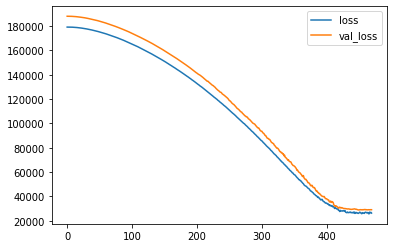

In [32]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=1000,
    callbacks=[early_stopping, lr_rop]
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [33]:
model.evaluate(X_valid, y_valid)

10/10 [==============================] - 0s 4ms/step - loss: 28866.9922 - mean_absolute_error: 28866.9922 - mean_squared_error: 2840292352.0000 - root_mean_squared_error: 53294.3945


[28866.9921875, 28866.9921875, 2840292352.0, 53294.39453125]

In [41]:
data_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
data_test_copy = data_test.copy(deep=True)

In [42]:
data_test_copy.drop('Id', axis=1, inplace = True)
data_test_copy.Alley.fillna(value='No alley access', inplace=True)
data_test_copy.BsmtQual.fillna(value='No Basement', inplace=True)
data_test_copy.BsmtCond.fillna(value='No Basement', inplace=True)
data_test_copy.BsmtExposure.fillna(value='No Basement', inplace=True)
data_test_copy.BsmtFinType1.fillna(value='No Basement', inplace=True)
data_test_copy.BsmtFinType2.fillna(value='No Basement', inplace=True)
data_test_copy.FireplaceQu.fillna(value='No Fireplace', inplace=True)
data_test_copy.GarageType.fillna(value='No Garage', inplace=True)
data_test_copy.GarageFinish.fillna(value='No Garage', inplace=True)
data_test_copy.GarageQual.fillna(value='No Garage', inplace=True)
data_test_copy.GarageCond.fillna(value='No Garage', inplace=True)
data_test_copy.PoolQC.fillna(value='No Pool', inplace=True)
data_test_copy.Fence.fillna(value='No Fence', inplace=True)
data_test_copy.MiscFeature.fillna(value='None', inplace=True)

In [43]:
data_test_copy_preprocessed = pd.DataFrame(preprocessor.fit_transform(data_test_copy), columns=data_test_copy.columns)

In [44]:
data_test_copy_preprocessed.drop(labels=['TotRmsAbvGrd', 'Electrical', 'OverallCond', 'BsmtFinSF2'], axis=1, inplace=True)

In [45]:
deep_pred = model.predict(data_test_copy_preprocessed)
deep_pred

array([[133393.56],
       [160312.47],
       [174171.5 ],
       ...,
       [169862.84],
       [117901.56],
       [207883.05]], dtype=float32)

Thanks for reading.